In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


In [2]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')

In [5]:
# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [6]:
# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#

In [7]:
# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

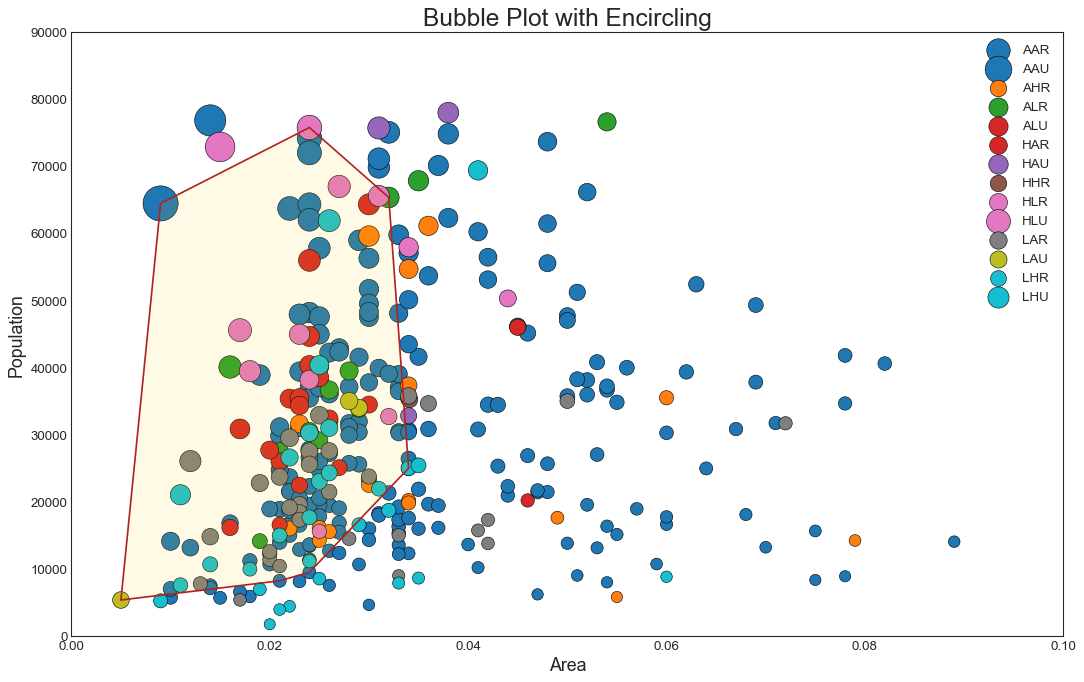

In [9]:
# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 